**MAKİNE ÖĞRENMESİ DOĞRUSAL REGRESYONLAR**

Basit Doğrusal Rgresyon

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")  #usecols metotu ile index sırası belirleyip unnamed sekmesini almayabiliriz
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:,1:len(df)] # dış kaynaktan veri okurken indexi değişken olarak tanıyabilir 
# değişken olarak tanıdı zaman iloc metodu ile sorunu ortadan kaldırırz
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().values.any()

False

In [6]:
df.corr()  #birbirleri arasındaki ilişkiye buradan bakabiliriz

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


TV Satışları en yüksek satış yaptıran reklam tarzı en az ise gazete olduğu buradan anlaşılıyor

In [7]:
import seaborn as sns

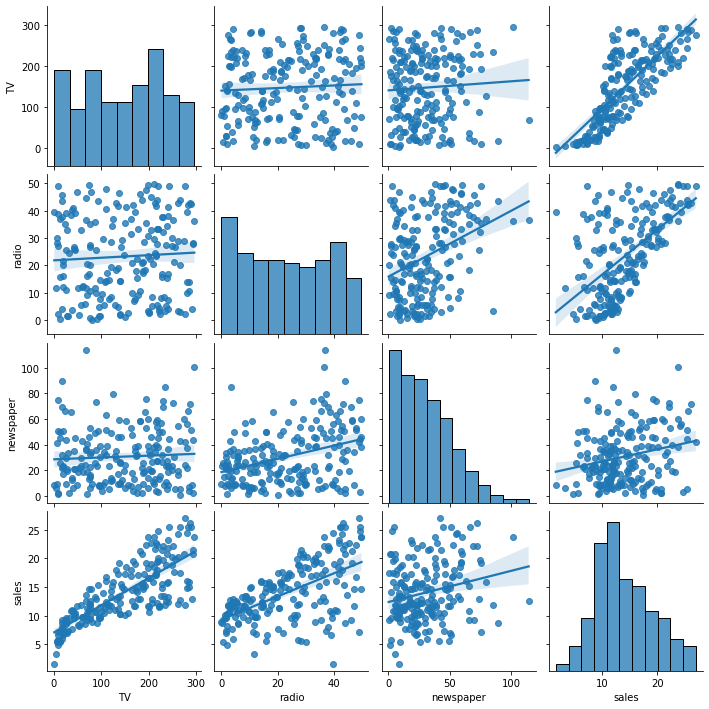

In [8]:
sns.pairplot(df,kind="reg");  #korelasyonu grafik olarak inceleyebiliriz

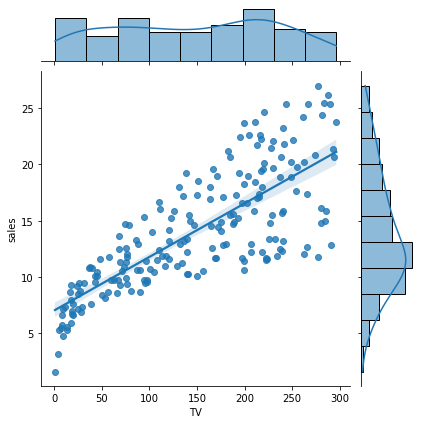

In [9]:
sns.jointplot(x = "TV",y = "sales", data= df,kind = "reg");   #2 değişken arasındaki ilişkiyi detaylı inceleyebiliriz

Statsmodels ile modelleme

In [10]:
import statsmodels.api as sm

In [11]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X)#matris işlemi için 1 değeri ekledik

In [13]:
X.head()  

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
Y = df["sales"]

In [15]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
lm = sm.OLS(Y,X)

In [17]:
model = lm.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        18:05:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared =  bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısı
Adj r-squared = Düzeltilmiş demek arasındaki fark düzeltilmemiş olanı şişmeye bağımlıdır ama bu bağımlı değildir
F-statistic = Modelin anlamlılığın anlamlandırılması için kurulan test istasyonu
Prob (f-statistic) = modelin anlamlı olup olmadığı gözükür

# coef = katsayı #bunun yorumu o değişkenin bir etkisi olmadığı zaman ortaya çıkan ortalama satış
# std err =  standart hatası
# 0.025 and 0.975 =  güven aralığı
# 0.0475 = TV harcalamalarında 1 birimlik artışa karşıt gelen artış

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()  #FARKLI KULLANIM TÜRÜ AMA SONUÇ AYNI

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        18:05:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params  #parametleri getirir

Intercept    7.032594
TV           0.047537
dtype: float64

In [21]:
model.summary().tables[1] # 3 indexten 2. sini alıyoruz

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
model.conf_int()  #katsayıların güven aralığı

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
model.f_pvalue  #modelin anlamlılığına ilişkin değer

1.467389700194647e-42

In [24]:
print("f_pvalue:","%.3f" % model.f_pvalue)

f_pvalue: 0.000


In [25]:
print("fvalue:","%.3f" % model.fvalue)

fvalue: 312.145


In [26]:
print("tvalue:","%.3f" % model.tvalues[0:1])

tvalue: 15.360


In [27]:
model.mse_model  #hata kareler ortalaması MSE

3314.618166868649

ortalaması 14 olan bir satış için bu rakam çok kötü

In [28]:
model.rsquared #açıklanabilirlik oranı gerçek hayat çin uygun çokta kötü değil

0.611875050850071

In [29]:
model.fittedvalues.head()  #bunlar tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [30]:
Y.head()  #gerçek y değerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [31]:
print("Sales = " + str("%.2f" % model.params[0]) + " +TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 +TV*0.05


In [32]:
# parametrelerin oranını kullanarak satış tahminini hesaplayabiliriz

Yukarıdaki modelin görselleştirilmesini yapalım

/home/sametaydinq/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


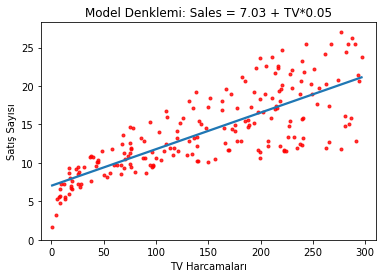

In [33]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [34]:
from sklearn.linear_model import LinearRegression


In [35]:
X = df[["TV"]]
Y = df["sales"]
reg = LinearRegression()  #örnekleme oluşturuyoruz
model = reg.fit(X,Y)
#model.summary()  #bunun böyle bir özelliği yok

In [36]:
model.intercept_

7.032593549127693

In [37]:
model.coef_

array([0.04753664])

In [38]:
model.score(X,Y) #bu skor rkare değeridir

0.611875050850071

In [39]:
model.predict(X)[0:10]  #tahmin edilen değerleri böyle görebiliriz

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# TAHMİN 

Sales = 7.03 + TV*0.04
30 Birimlik tv harcamasını hesaplayalım 

In [40]:
7.03 + 30*0.04

8.23

In [41]:
model.predict([[30]])  #içerisine yüklenen sayıyı dener burası daha bilimsel virgül sonrası değerleride kapsar

/home/sametaydinq/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [42]:
yeni_veri = [[5],[90],[200]]

In [43]:
model.predict(yeni_veri)  #içindeki tüm değerler için sonuç aldı

/home/sametaydinq/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

# Artıklar ve makine öğrenmesindeki önemi

In [44]:
from sklearn.metrics import mean_squared_error , r2_score

In [45]:
lm = smf.ols("sales ~ TV",df)
model = lm.fit()

In [46]:
mse = mean_squared_error(Y,model.fittedvalues) #tahmin edilen değer ile gerçek arasındaki farkların karesinin ortalamasını buldu

In [47]:
mse

10.512652915656757

In [48]:
import numpy as np
rmse = np.sqrt(mse)

In [49]:
rmse

3.2423221486546887

In [50]:
reg.predict(X)[0:10] #bundan öncesinde reg = LinearRegreesion() ve ardından model = reg.fit[X,Y] yaptığımız için hata vermedi

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [51]:
Y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [52]:
k_t = pd.DataFrame({"gercek_y": Y[0:10],
                  "tahmin_y":reg.predict(X)[0:10]})

In [53]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [54]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [55]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [56]:
k_t["hata"].mean()  #böyle bir ortalama alırsak - ve + lar bizi yanıltır

0.20389815715192317

In [57]:
k_t["hata_kare"] = k_t["hata"]**2

In [58]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [59]:
np.sum(k_t["hata_kare"]) #Toplam hatamız 

92.90350329638103

In [60]:
np.mean(k_t["hata_kare"])

9.290350329638105

In [61]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

Bu değerler ilk 10 değer için geçerlidir sadece

In [62]:
# Amacımız hata bölümünü minimum yapmak bunun için hatalar üstüne tekrar tekrar işlemler yapılacak

In [63]:
 model.resid[0:10]  #modelin artıkları

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

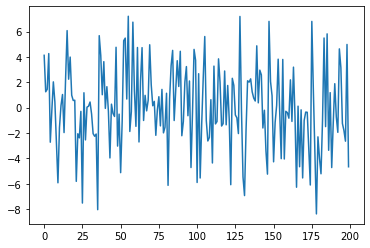

In [64]:
plt.plot(model.resid)

# ÇOKLU DOĞRUSAL REKRESYON

In [65]:
import pandas as pd
ad = pd.read_csv("Advertising.csv",usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [66]:
X = df.drop("sales",axis = 1)
X[0:10]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [67]:
y = df["sales"]

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


In [69]:
X_train,X_test,y_train , y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [70]:
X_train.shape

(160, 3)

In [71]:
y_train.shape

(160,)

In [72]:
X_test.shape

(40, 3)

In [73]:
y_test.shape

(40,)

In [74]:
training = df.copy()

In [75]:
## statsmodels

In [76]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [77]:
lm = sm.OLS(y_train,X_train)

In [78]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):                   1.28e-137
Time:                        18:05:10   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square artmış çünkü  2 değişken kullandık

In [79]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [80]:
## scikit learn model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


In [82]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [83]:
model.intercept_

2.979067338122629

In [84]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [85]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [86]:
model.predict(yeni_veri)

/home/sametaydinq/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [87]:
import numpy as np

In [88]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))  #train içinde tahmin edilen y ile gerçek y yi karşılaştırıyoruz

In [89]:
rmse

1.644727765644337

In [90]:
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))  # testteki hatamız

In [91]:
rmse

1.7815996615334504

In [92]:
model.score(X_train,y_train)

0.8957008271017817

In [93]:
cross_val_score(model,X_train,y_train,cv = 10,scoring = "r2").mean()  

0.7913548596916338

In [94]:
np.sqrt(-cross_val_score(model,
                        X_train,
                        y_train,
                        cv = 10,
                        scoring = "neg_mean_squared_error")).mean()  #gerçek test hatamız

1.6513523730313335

In [95]:
np.sqrt(-cross_val_score(model,
                        X_test,
                        y_test,
                        cv = 10,
                        scoring = "neg_mean_squared_error")).mean()  #test test hatamız

1.8462778823997095

**PCR TEMEL BİLEŞEN REGRESYONU**

In [96]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()

In [97]:
df = df.dropna() #eksik olanları sildik şu anlık işimizi görmeyecek

In [98]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [101]:
#kategorik değişkenleri dönüştüreceğiz

In [102]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [103]:
y = df["Salary"]

In [104]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
#burada dami değişkeni olanları yani aynısından olanlartı çıkarttık

In [105]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [106]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [109]:
pca= PCA()
X_reduced_train = pca.fit_transform(scale(X_train))  #dönüştürme işlemi gerçekleşti

In [110]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [111]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [112]:
#veri setinde 10. değişkene geldiğinde %97 açıklayabilir durumda

In [113]:
lm = LinearRegression()

In [114]:
pcr_model = lm.fit(X_reduced_train,y_train)  #tüm modeli kullanarak fit ettik

In [115]:
pcr_model.intercept_

543.4834416243655

In [116]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

Tahmin

In [117]:
y_pred = pcr_model.predict(X_reduced_train)

In [118]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [119]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.32928255649756

In [120]:
df["Salary"].mean()

535.9258821292775

In [121]:
r2_score(y_train,y_pred)

0.577007525041018

In [122]:
pca2 = PCA()

In [123]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [124]:
y_pred = pcr_model.predict(X_reduced_test)

In [125]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.1575364149963

**MODEL TUNİNG**

In [126]:
import matplotlib.pyplot as plt


In [127]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [128]:
from sklearn import model_selection

In [129]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [130]:
lm = LinearRegression()

In [131]:
RMSE = []

In [132]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

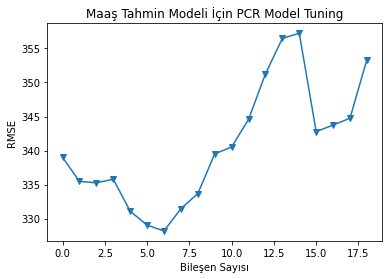

In [133]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [134]:
lm = LinearRegression()

In [135]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [136]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [137]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [138]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [139]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233


# PLS KISMI EN KÜÇÜK KARELER REGRESYONU

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection

In [141]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [142]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [143]:
pls_model = PLSRegression(n_components = 2).fit(X_train,y_train)

In [144]:
pls_model.coef_ 

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [145]:
## tahmin 

In [146]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [147]:
pls_model.predict(X_train)[0:10] #tahmin değerleri

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [148]:
y_pred = pls_model.predict(X_train)

In [149]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [150]:
r2_score(y_train,y_pred)

0.5140424486535482

In [151]:
y_pred = pls_model.predict(X_test)  #testte göre thmin et

In [152]:
np.sqrt(mean_squared_error(y_test,y_pred))  #test ile karşılaştırıyoryz

398.09956327448526

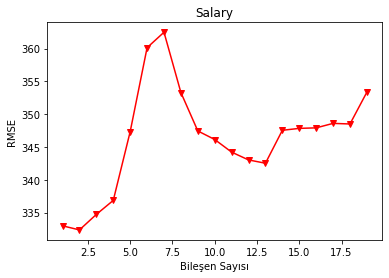

In [153]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = [] #bu listeye her bir modelin scorlarını ekleyeceğiz

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [154]:
# 2 bileşen sayısı optimum hatayı veriyor 

In [155]:
pls_model = PLSRegression(n_components = 2).fit(X_train,y_train)  # 2 bileşenli yeni final modeli

In [156]:
y_pred = pls_model.predict(X_test)

In [157]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [158]:
#modeli tune ettikten sonra modelin olması gereken bileşen sayısını 2 bulduk ve 2 ye göre işlem yaptık

# Ridge Regresyon

In [159]:
#Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara ceza uygulama işlemi

In [160]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [161]:
from sklearn.linear_model import Ridge

In [162]:
ridge_model = Ridge(alpha= 0.1).fit(X_train,y_train)

In [163]:
ridge_model

Ridge(alpha=0.1)

In [164]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [165]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

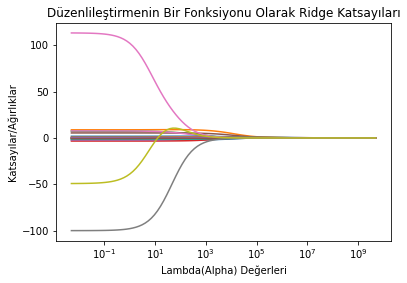

In [166]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:  #bu lambda değerlerine göre eğitip katsayılarını kümeye ekleyeceğiz
    ridge_model.set_params(alpha = i)  #alfa değerlerini her seferinde değiştirecek
    ridge_model.fit(X_train, y_train)  # eğitecek her seferinde
    katsayilar.append(ridge_model.coef_)  #elde ettiği katsayılarla doldurdu
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log')   #logaritmik dönüşüm yaptık daha rahat görebilmek için

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

Tahmin

In [167]:
y_pred = ridge_model.predict(X_test)

In [168]:
np.sqrt(mean_squared_error(y_test,y_pred)) #alpha 0.1 e göre

357.0517922282842